# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Loading and preparing the data

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [5]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

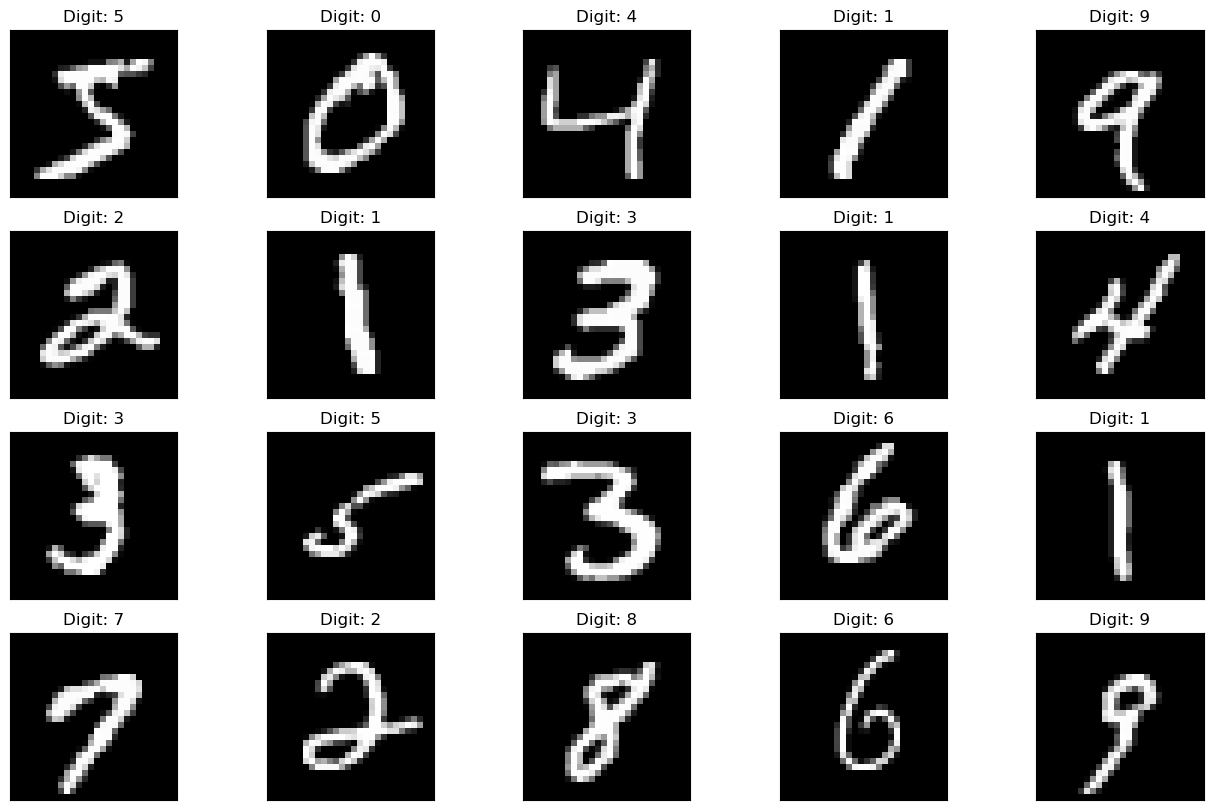

In [6]:
def plot_digit(image, digit, plt, i):
 plt.subplot(4, 5, i + 1)
 plt.imshow(image, cmap=plt.get_cmap('gray'))
 plt.title(f"Digit: {digit}")
 plt.xticks([])
 plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
 plot_digit(X_train[i], y_train[i], plt, i) 
plt.show()

In [7]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

# Creating the Model

In [8]:
model = Sequential([
 Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
 MaxPooling2D((2, 2)),
 Flatten(),
 Dense(100, activation="relu"),
 Dense(10, activation="softmax")
])


In [9]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
 optimizer=optimizer, 
 loss="sparse_categorical_crossentropy", 
 metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

# Train the Model

In [10]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2368 - accuracy: 0.9285 - val_loss: 0.0982 - val_accuracy: 0.9717
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0839 - accuracy: 0.9749 - val_loss: 0.0654 - val_accuracy: 0.9787
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.0576 - val_accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0482 - val_accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.0490 - val_accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.0413 - val_accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0443 -

1/1 [==============================] - 0s 44ms/step


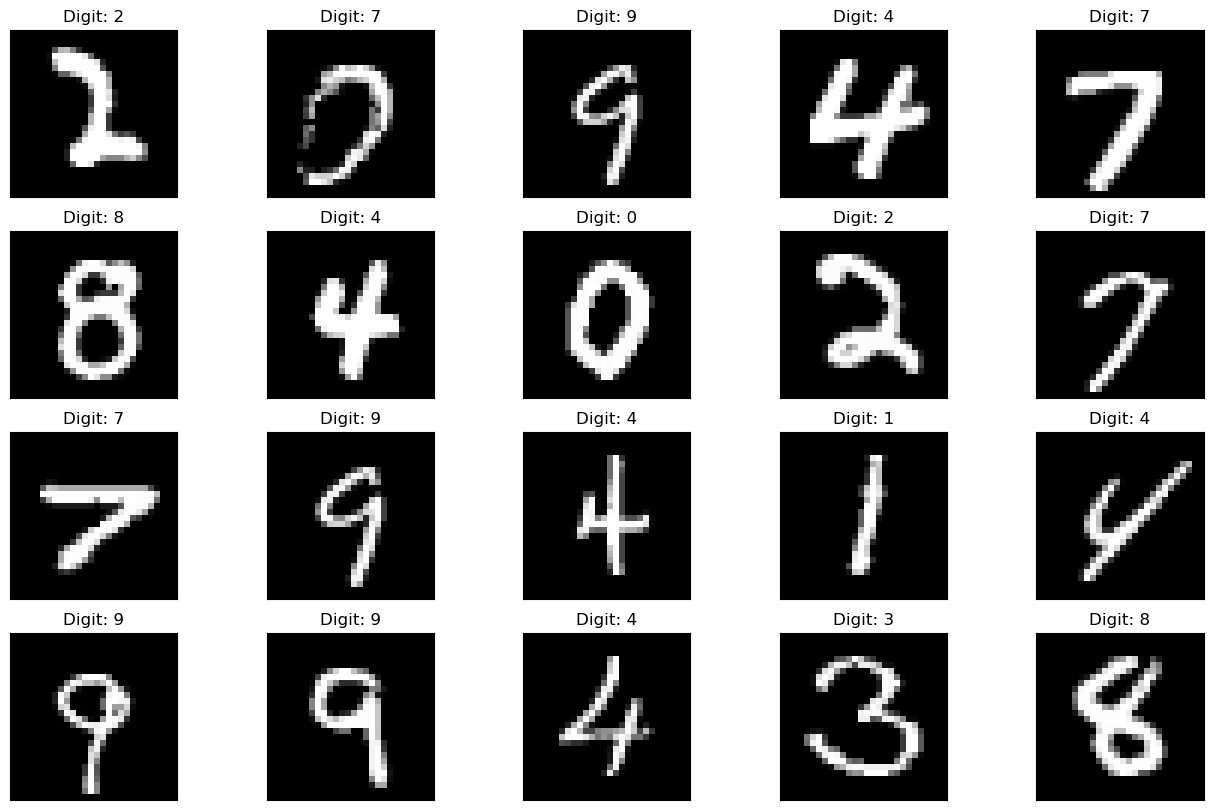

In [11]:
plt.figure(figsize=(16, 10))
for i in range(20):
 image = random.choice(X_test).squeeze()
 digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
 plot_digit(image, digit, plt, i)
plt.show()

In [12]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 2s 6ms/step


0.9871

# Estimating the model's performance

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])    #Test Loss
print('Test accuracy:', score[1])    #Test Accuracy

Test loss: 0.04092574864625931
Test accuracy: 0.9871000051498413


In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 10
epochs_range = range(epochs)

<Figure size 640x480 with 0 Axes>

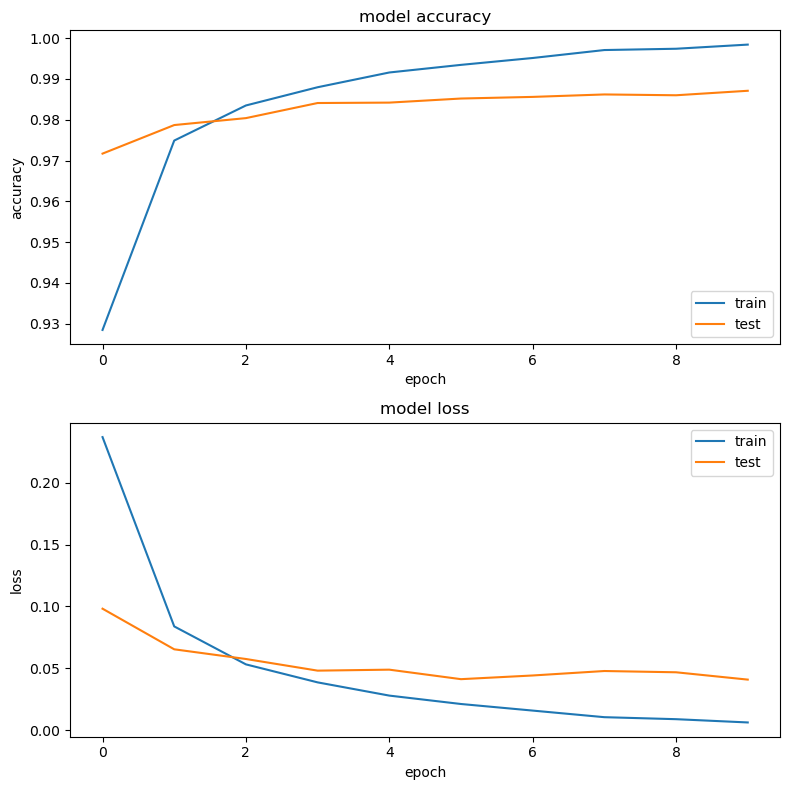

In [15]:
import os
# plotting the metrics
fig = plt.figure()
plt.figure(figsize=(8, 8))

plt.subplot(2,1,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


plt.subplot(2,1,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [16]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
 json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk


In this assignment, we’re tasked with building an image classification model using a Convolutional Neural Network (CNN) on the MNIST dataset, which contains 28x28 grayscale images of handwritten digits. The project is divided into four stages: data loading and preprocessing, model architecture definition, model training, and performance evaluation. Initially, the dataset is scaled to a range of 0-1 for faster model convergence. The CNN architecture begins with convolutional and pooling layers to extract image features, followed by fully connected layers for classification. The model is trained using an SGD optimizer with cross-entropy loss, targeting >90% accuracy. After training, the model’s performance is tested on unseen data to validate its generalization. This assignment focuses on practical deep learning application skills, aiming to achieve high accuracy while improving the model’s confidence in predictions.

Key points and definitions for the MNIST CNN image classification assignment:

1. **Convolutional Neural Network (CNN)**: A type of neural network particularly effective for image processing tasks. It uses convolutional layers to automatically learn spatial hierarchies in images by detecting edges, textures, and complex shapes.

2. **MNIST Dataset**: A collection of 60,000 training and 10,000 test images of handwritten digits (0-9), widely used as a benchmark for image classification models. Each image is 28x28 pixels in grayscale.

3. **Data Preprocessing**: A step to prepare the data for training, involving scaling pixel values to a 0-1 range. This helps the model train faster and prevents issues caused by large input values.

4. **Convolutional and Pooling Layers**: The core layers in a CNN. **Convolutional layers** apply filters to input images to extract features, while **Pooling layers** reduce the dimensionality, retaining only the most essential information and reducing computational cost.

5. **Fully Connected Layers**: Dense layers at the end of a CNN where all nodes are connected. These layers interpret the features extracted by the convolutional layers and make predictions based on the learned patterns.

6. **Activation Function**: A mathematical function applied to the output of each layer, with **ReLU (Rectified Linear Unit)** commonly used in convolutional layers to add non-linearity, and **Softmax** in the final layer for outputting probabilities for each class.

7. **Loss Function**: The function that measures how well the model’s predictions match the actual labels. For this classification task, **cross-entropy loss** is used to quantify prediction error.

8. **Optimizer**: An algorithm that adjusts the model's weights to minimize the loss function. Here, **SGD (Stochastic Gradient Descent)** is used to iteratively improve model accuracy through backpropagation.

These elements form the backbone of a CNN model, helping it to learn from the MNIST dataset and accurately classify handwritten digits.